In [11]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local") \
   .appName("test111") \
   .getOrCreate()

sc = spark.sparkContext
import pandas as pd, numpy as np


In [12]:
import string
# x = sc.parallelize([("a", 1), ("b", 1), ("a", 1)])
# x.take(1)
# df= spark.createDataFrame(x).toDF('al','nu')
# df.show()
haha = sc.parallelize([("beatles", ["help|hey jude","as",1],2),("romeo", ["eres mia","gerqg"],5)]
)
haha.collect()



[('beatles', ['help|hey jude', 'as', 1], 2),
 ('romeo', ['eres mia', 'gerqg'], 5)]

In [13]:
singersDF = spark.createDataFrame(haha).toDF("name", "hit_songs",'num')
singersDF.show()

+-------+--------------------+---+
|   name|           hit_songs|num|
+-------+--------------------+---+
|beatles|[help|hey jude, a...|  2|
|  romeo|   [eres mia, gerqg]|  5|
+-------+--------------------+---+



In [14]:
res = singersDF.toPandas()

In [15]:
res.head()

,name,hit_songs,num
0,beatles,"[help|hey jude, as, 1]",2
1,romeo,"[eres mia, gerqg]",5


In [16]:
res.hit_songs[:3]

0    [help|hey jude, as, 1]
1         [eres mia, gerqg]
Name: hit_songs, dtype: object

In [20]:
# preds = ['234',5342,'gbgf']
# submission = pd.concat([res, pd.DataFrame(preds, columns = 'label_cols')], axis=1)

In [21]:
singersDF.dtypes

[('name', 'string'), ('hit_songs', 'array<string>'), ('num', 'bigint')]

In [22]:
singersDF.printSchema()

root
 |-- name: string (nullable = true)
 |-- hit_songs: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- num: long (nullable = true)



In [23]:
def toDate(s):
    return str(s)+'-'

# 2.注册自定义函数
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# 根据python的返回值类型定义好spark对应的数据类型
# python函数中返回的是string，对应的pyspark是StringType
toDateUDF=udf(toDate, StringType())  

# 使用自定义函数
actualDF = singersDF.withColumn('name',toDateUDF('name'))
actualDF.show()

+--------+--------------------+---+
|    name|           hit_songs|num|
+--------+--------------------+---+
|beatles-|[help|hey jude, a...|  2|
|  romeo-|   [eres mia, gerqg]|  5|
+--------+--------------------+---+



In [71]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# print(string.punctuation)

all_word = []
def mytoken_lemm(text):
    global all_word
    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    lemms = []
    for item in words:
#         lemms.append(WordNetLemmatizer().lemmatize(item))
        all_word.append(WordNetLemmatizer().lemmatize(item))
#     return lemms

In [72]:
train = pd.read_csv('data/train.csv')



In [73]:
# train['comment_text'] = train['comment_text'].map(lambda com : mytoken_lemm(com))

In [74]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [86]:

def output_words(label):
    for index, row in train.iterrows():
        if row[label]==1:
            row['comment_text'] = mytoken_lemm(row['comment_text'])
    path = label+'_words.txt'
    fileObject = open(path, 'w') 
    fileObject.write(str(all_word)) 
    fileObject.close()
    print(label,'done')

In [76]:
all_label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
for i in all_label:
    all_word = []
    output_words(i)

[]
comment_text done
[]
toxic done
[]
severe_toxic done
[]
obscene done
[]
threat done
[]
insult done
[]
identity_hate done


In [ ]:
all_word=[]
print(all_word)
for index, row in train.iterrows():
    if row['toxic']==1:
        row['comment_text'] = mytoken_lemm(row['comment_text'])

fileObject = open('toxic_words.txt', 'w') 
fileObject.write(str(all_word)) 
fileObject.close()

In [30]:
print(all_word[1000])

classical


In [38]:
##保存
fileObject = open('comment_words.txt', 'w') 
fileObject.write(str(all_word)) 
# for ip in all_word:  
#     fileObject.write(str(ip))  
#     fileObject.write('\n') 
fileObject.close()


In [84]:
from wordcloud import WordCloud,STOPWORDS
from ast import literal_eval

def getWordCloud(path):
    with open(path,'r') as f:
        fd = f.read()
    res = literal_eval(fd)
    length = len(fd)
    print(path,'total words: ',length)
#     print(type(res))


    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=STOPWORDS,width=1200,height=600,scale=1.5).generate_from_text(','.join(res))

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()

words/toxic_words.txt total words:  4086904


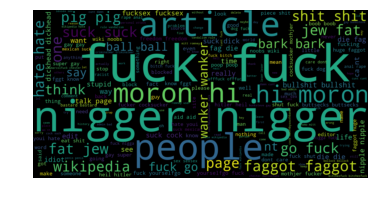

words/severe_toxic_words.txt total words:  702859


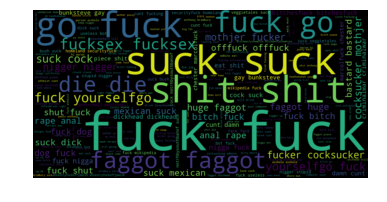

words/obscene_words.txt total words:  2228411


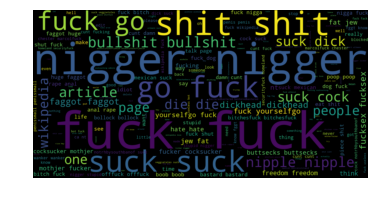

words/threat_words.txt total words:  124527


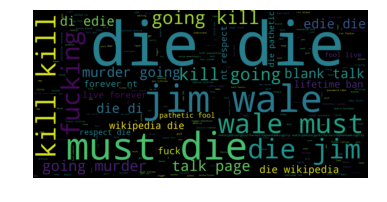

words/insult_words.txt total words:  2000649


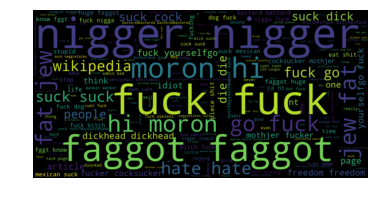

words/identity_hate_words.txt total words:  429209


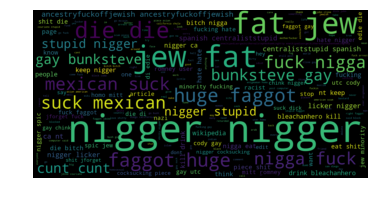

In [85]:
all_label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
for i in all_label:
    path = 'words/'+i+'_words.txt'
    getWordCloud(path)

